# Problem Statement:

Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.

Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.
Recommend the steps to retain existing telecom customers.
Build customer churn, prediction model.

#### Importing libraries


In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import missingno as mn


##### Importing the Dataset

In [183]:
cca=pd.read_csv("./telecom_churn.csv")
cca.head(20).style.background_gradient(cmap='Blues')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000
1,0,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000
2,0,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000
3,0,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000
4,0,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000
5,0,118,0,0,0.000000,0,223.400000,98,57.000000,11.030000,6.300000
6,0,121,1,1,2.030000,3,218.200000,88,87.300000,17.430000,7.500000
7,0,147,0,0,0.000000,0,157.000000,79,36.000000,5.160000,7.100000
8,0,117,1,0,0.190000,1,184.500000,97,63.900000,17.580000,8.700000
9,0,141,0,1,3.020000,0,258.600000,84,93.200000,11.100000,11.200000


### Lets Try To Understand our Data

In [184]:
cca.shape

(3333, 11)

In [185]:
cca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [186]:
cca.describe().style.background_gradient(cmap='Oranges')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


checking for null values

<AxesSubplot:>

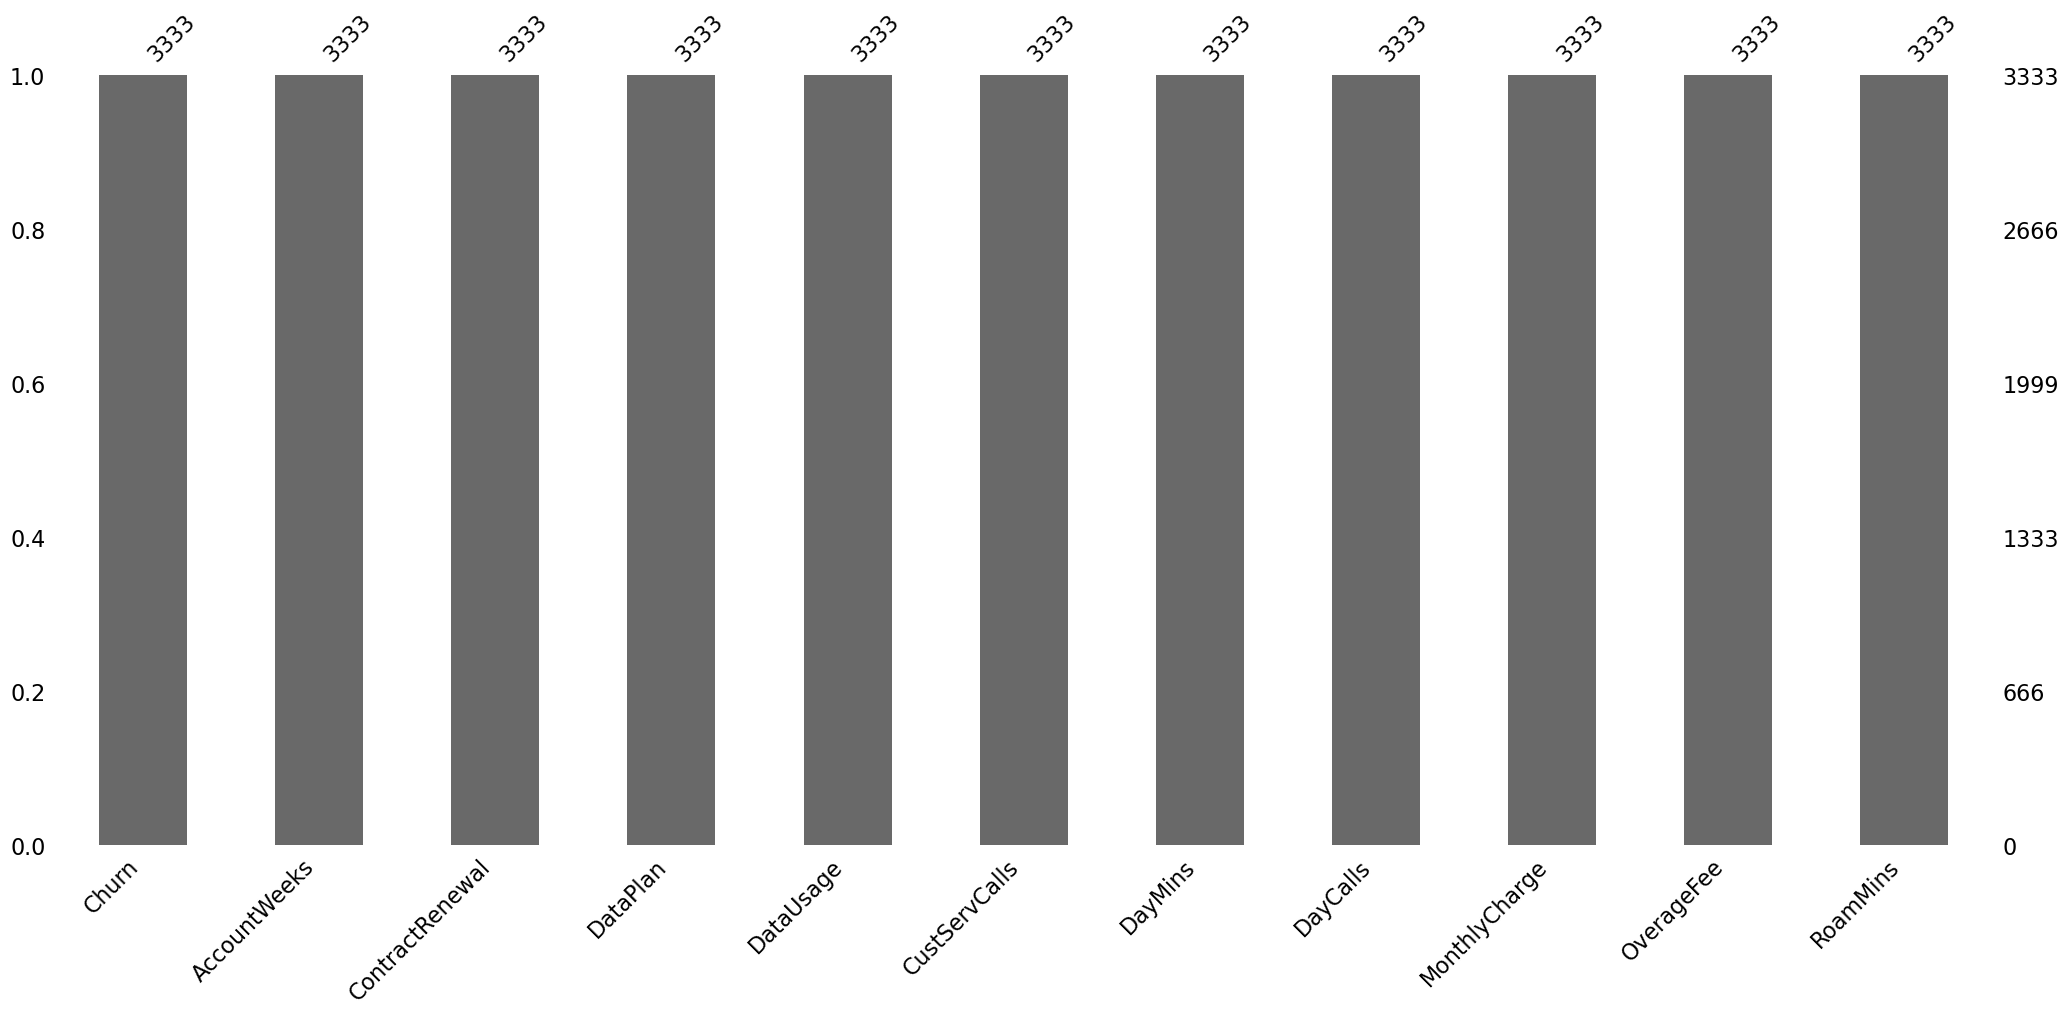

In [187]:
mn.bar(cca)

In [188]:
cca.isnull().sum().sum()

0

In [189]:
cca.duplicated().value_counts()

False    3333
dtype: int64

In [190]:
cca.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

Conclusion:

1. we have 11 cloumns and 3333 rows and all the columns are Numerical and there is no categorical column

2. The Data is Clean with No null values and No duplicate values

### Adding A New Feature

In [191]:
cca['Totalcharges']=cca.MonthlyCharge + cca.OverageFee
cca['Totalcharges'].describe()


count    3333.000000
mean       66.356649
std        17.312320
min        19.380000
25%        54.010000
50%        64.030000
75%        77.030000
max       123.630000
Name: Totalcharges, dtype: float64

## Visualisations

### Univariate Analysis

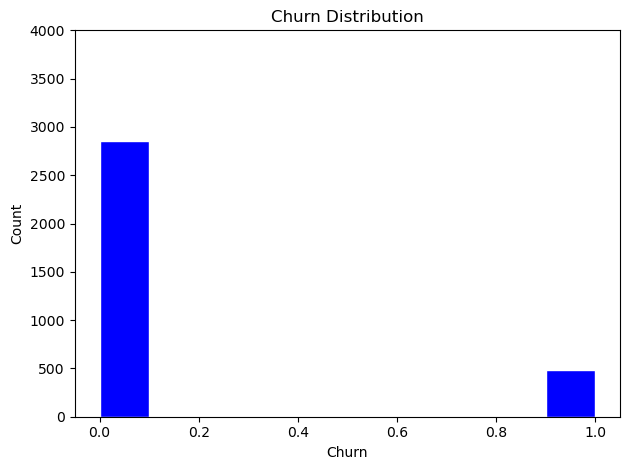

In [192]:
#Churn Distribution
plt.hist(cca['Churn'], color='blue', edgecolor='white')

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.ylim(0, 4000)

plt.tight_layout()

plt.show()


#### Insights

1. Churn Count is roughly about 15 percent That means Retention Rate is Moderate


In [193]:
def hist(df, x,y):
    plt.hist(df[x], color=y, edgecolor='white')
    plt.title(f"{x} Distribution")
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show()


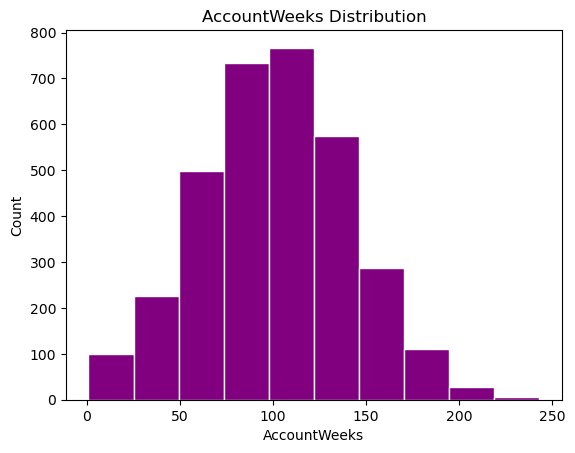

In [194]:
#Accounts weeks Histogram
hist(cca,'AccountWeeks','purple')

#### Insight
1. The average time the Customers have been associated with the company is Around 100 weeks

2. There are few Customers using the services over 200 weeks and few new customers as well

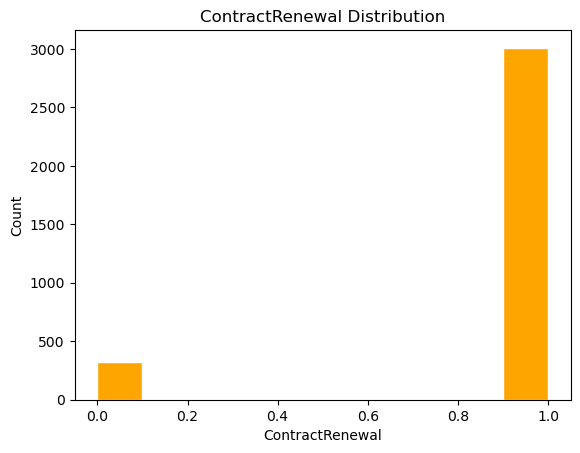

In [195]:
#Contract Renewal Histogram
hist(cca,'ContractRenewal','orange')

#### Insights
1. The above Graph clearly Indicates That Most of the customers Renewed there Contract

2. There Are few percentage of people who did not renew the contract will be our Main focus

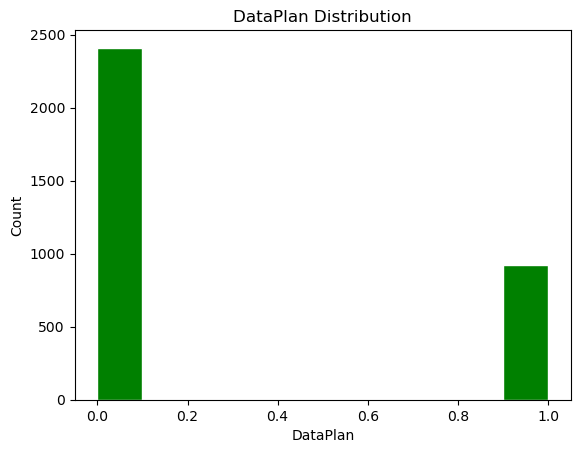

In [196]:
#Data Distribution Histogram
hist(cca,'DataPlan','green')

#### Insights

1.The above Graph indicates that Only a limited people Have a Data-plan  

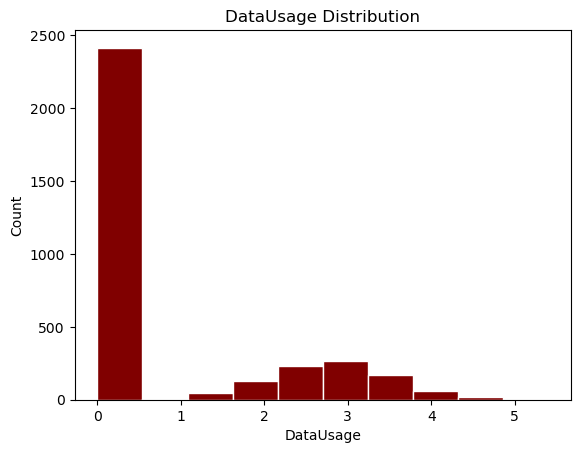

In [197]:
#Data Useage Histogram
hist(cca,'DataUsage','maroon')

#### Insights
1. Most of the customers Are not Using Data Services this is a concern that needs to be looked upon

2. Maximum Data user by any customer is 3Gb 


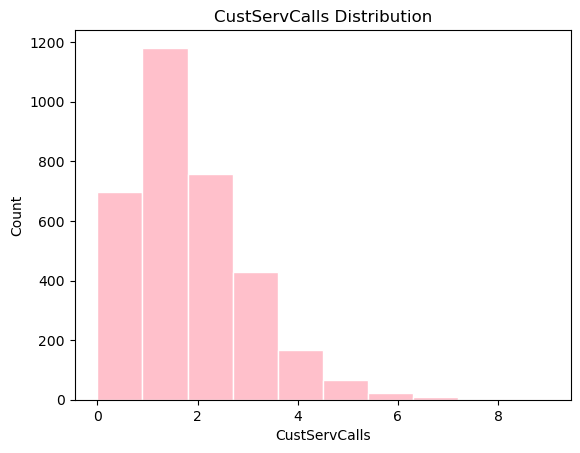

In [198]:
#### Customer Calls Distribution
hist(cca,'CustServCalls','pink')

#### Insights
1. Average Customer service Calls is 2 

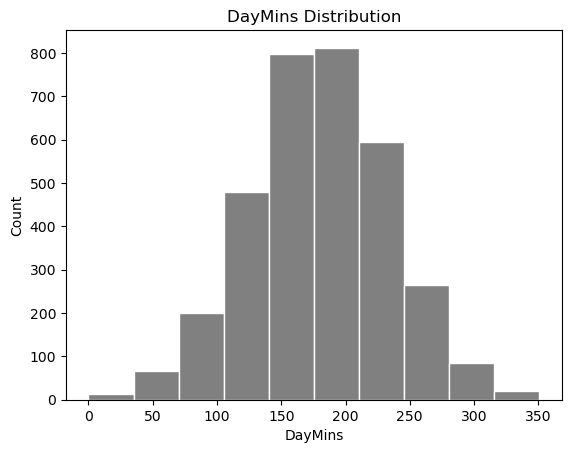

In [199]:
#### Day Mins Distributions
hist(cca,'DayMins','grey')

#### Insights
1. On an Average Customers Used Used For 180Mins

2. Few People are Using for less than 10 mins and there are few who are using for over 300mins

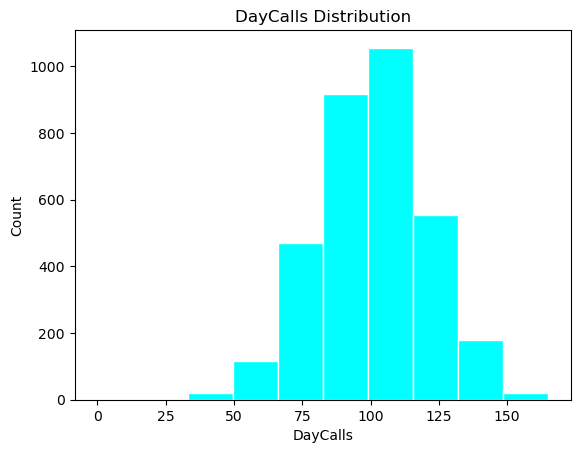

In [200]:
# Day calls Distribution
hist(cca,'DayCalls','aqua')

#### Insights

1. On an Average Customers mak 100 Calls

2. A Number of Customers make less Than 50 calls and Few Customers make more than 150 calls 

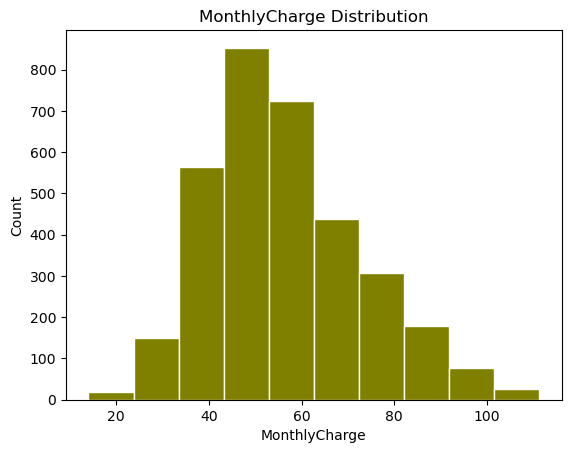

In [201]:
# Monthly Charge Distribution
hist(cca,'MonthlyCharge','olive')

#### Insights 

1. Average Monthly Charge of Customers is 55 

2. A large segement of customers Have a monthly charge below 50 an even Lesser

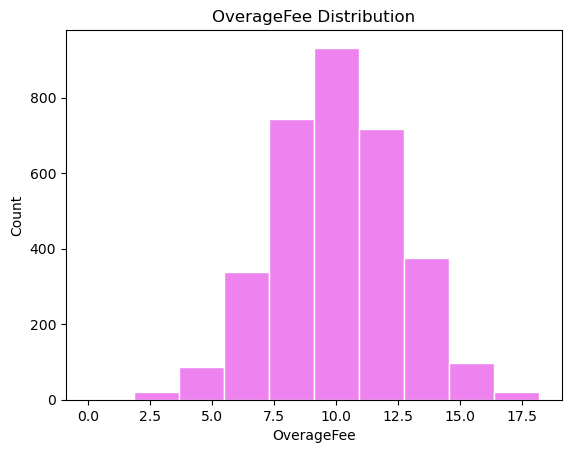

In [202]:
#overage Fee Disribution
hist(cca,'OverageFee','violet')

#### Insights

1.Most of the customers have Overage Fee and majority of them have over 10 Dollars i.e a significant Amount


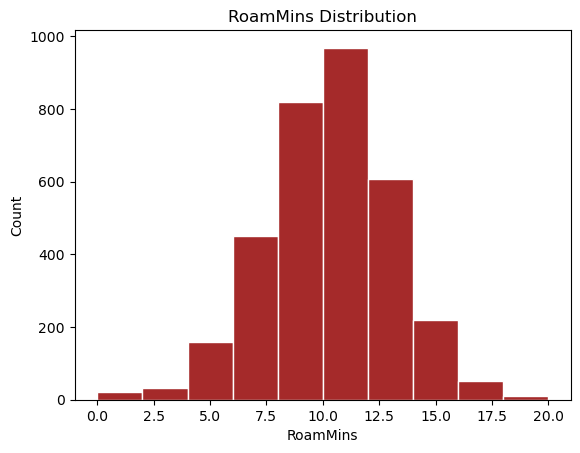

In [203]:
#Roam mins Distribution
hist(cca,'RoamMins','Brown')

#### Insights
1. Average Roaming Mins is 10 and 95 percent of the customers have used the Connection in Roam Areas

2. Mostly People use Connection in there Home Service area only

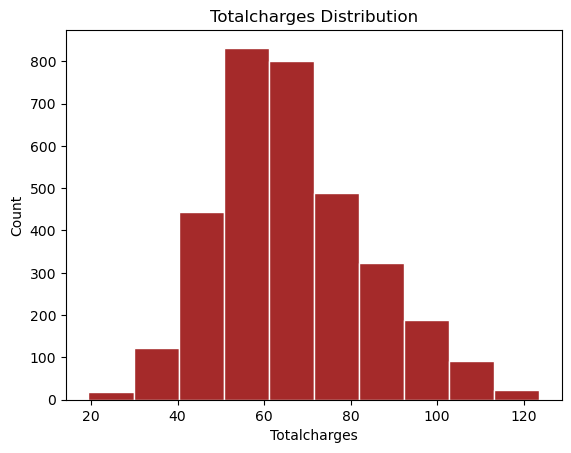

In [204]:
#Roam mins Distribution
hist(cca,'Totalcharges','Brown')

#### Insghts

1. Average TotalCharges are around 60 Dollars

2. Majority of the people are paying over $50 

### Lets Drill Down And Divide the customers as Existing Customers And Churn Customers

In [205]:
# Non Active customers
churned=cca[cca['Churn'] == 1]
churned.head().style.background_gradient('Reds')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Totalcharges
10,1,65,1,0,0.290000,4,129.100000,137,44.900000,11.430000,12.700000,56.330000
15,1,161,1,0,0.000000,4,332.900000,67,84.000000,15.890000,5.400000,99.890000
21,1,77,1,0,0.000000,5,62.400000,89,26.000000,8.500000,5.700000,34.500000
33,1,12,1,0,0.000000,1,249.600000,118,64.000000,12.620000,11.800000,76.620000
41,1,135,0,1,3.940000,0,173.100000,85,86.400000,10.200000,14.600000,96.600000


In [206]:
# Active customers
active=cca[cca['Churn'] == 0]
active.head().style.background_gradient('Greens')


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Totalcharges
0,0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000,98.870000
1,0,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000,91.780000
2,0,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000,58.060000
3,0,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000,60.100000
4,0,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000,48.420000


Univariate analysis for Churned and Active customers

since we are going to use it multiple time we will create a Function

In [207]:
def plot_churn_comparison(dataset, column, color):
    # Create a figure and two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Churned Customers
    ax1.hist(dataset[dataset['Churn'] == 1][column], color='red', edgecolor='white')
    ax1.set_title("Churned Customers")
    ax1.set_xlabel(column)
    ax1.set_ylabel("Count")
    ax1.set_ylim(0, 4000)

    # Active Customers
    ax2.hist(dataset[dataset['Churn'] == 0][column], color=color, edgecolor='white')
    ax2.set_title("Active Customers")
    ax2.set_xlabel(column)
    ax2.set_ylabel("Count")
    ax2.set_ylim(0, 4000)

    plt.tight_layout()
    plt.show()

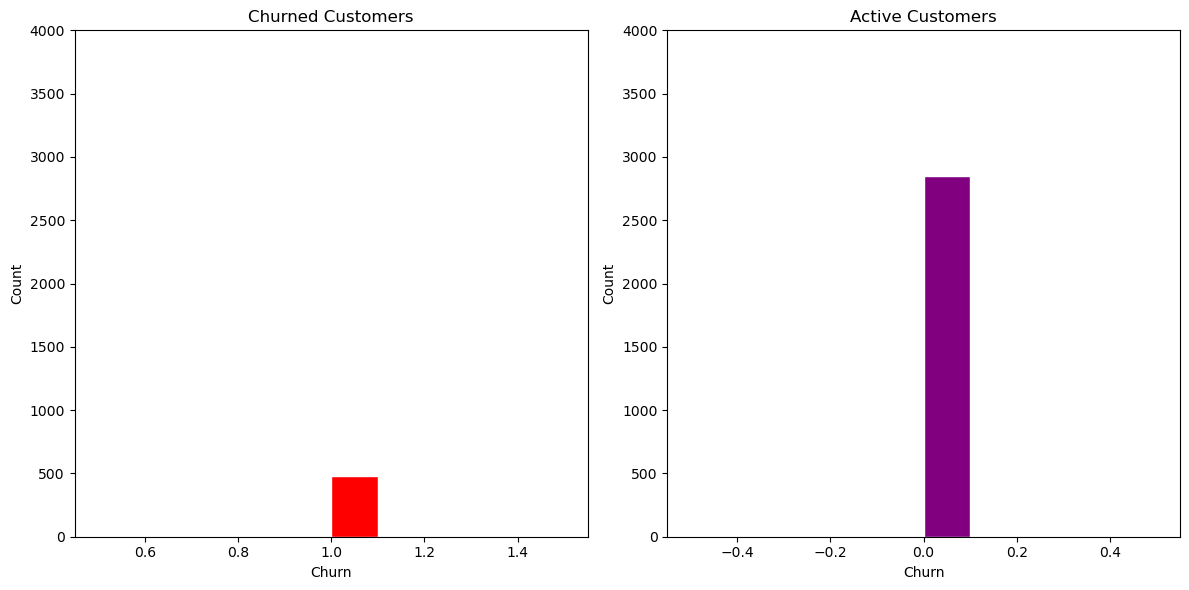

In [208]:
plot_churn_comparison(cca,'Churn',color='purple',)

#### Insights

1. Churn Count is roughly about 15 percent That means Retention Rate is Moderate


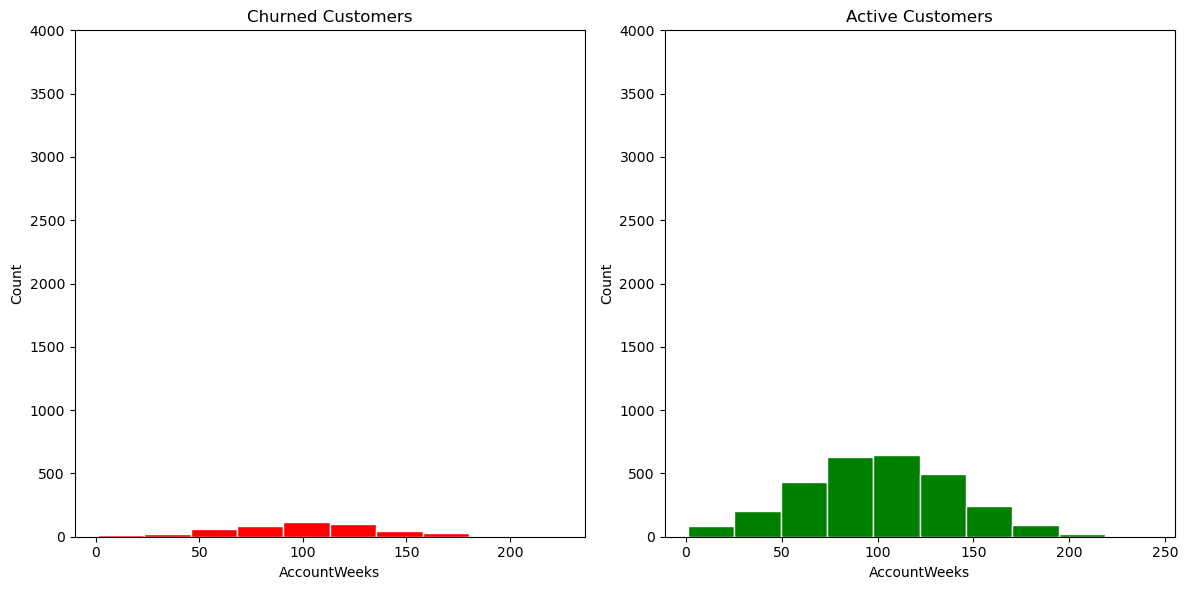

In [209]:
plot_churn_comparison(cca,'AccountWeeks',color='green',)

In [210]:
churned.AccountWeeks.mean()

102.66459627329192

Insights

1. Average Account weeks of Churned customers is over 100 weeks that means they were engaged with us for 2 years

2. Active customers Graph Indicates that we are getting New Customers as well as  customer retention rate is fair 

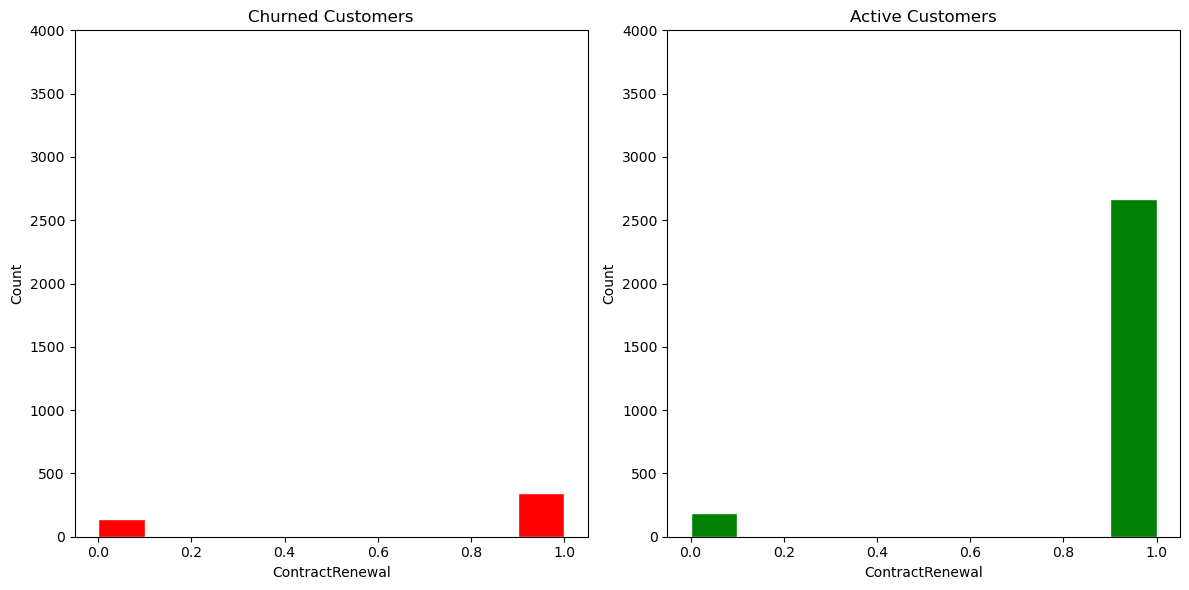

In [211]:
plot_churn_comparison(cca,'ContractRenewal',color='green',)

In [212]:
churned['ContractRenewal'].value_counts()

1    346
0    137
Name: ContractRenewal, dtype: int64

#### Insights

1. Majority of the Churned Customers have renewed there contract at least onece 

2. few Existing customers have not renewed there contract may be they are new and there contract is not over yet , However we need to check wheather any older existing customer is not renewing the contract 

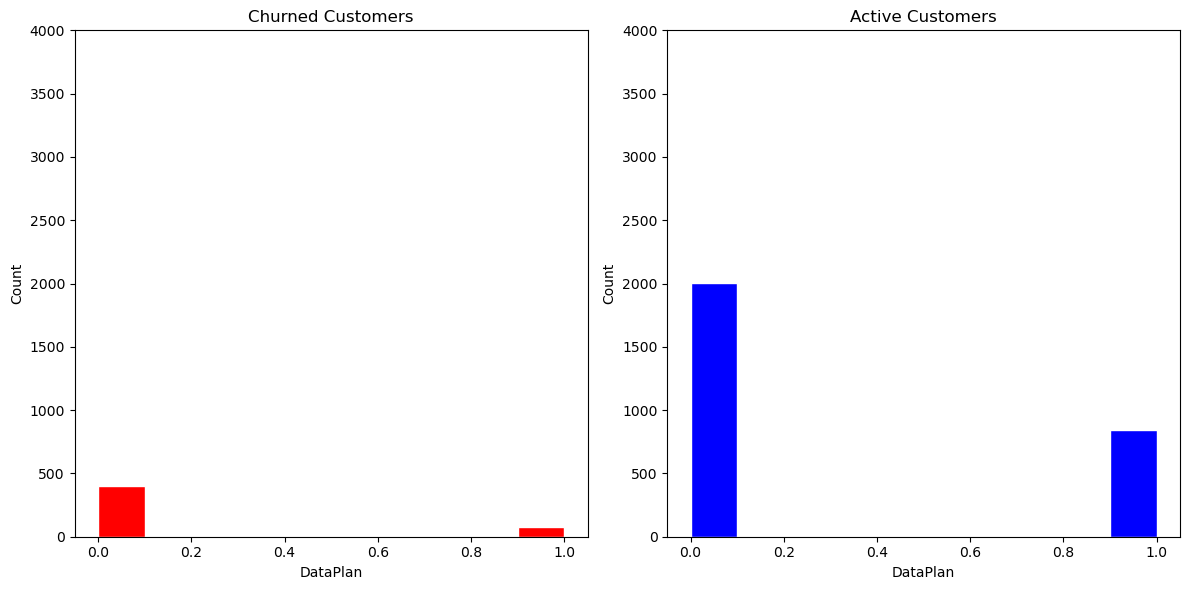

In [213]:
plot_churn_comparison(cca,'DataPlan',color='blue',)

#### Insights 
1. Majority of Existing Users Are not Availing any Data Plan Need to interact  with them
 
2. Among the churned accounts few customers used to avail data services

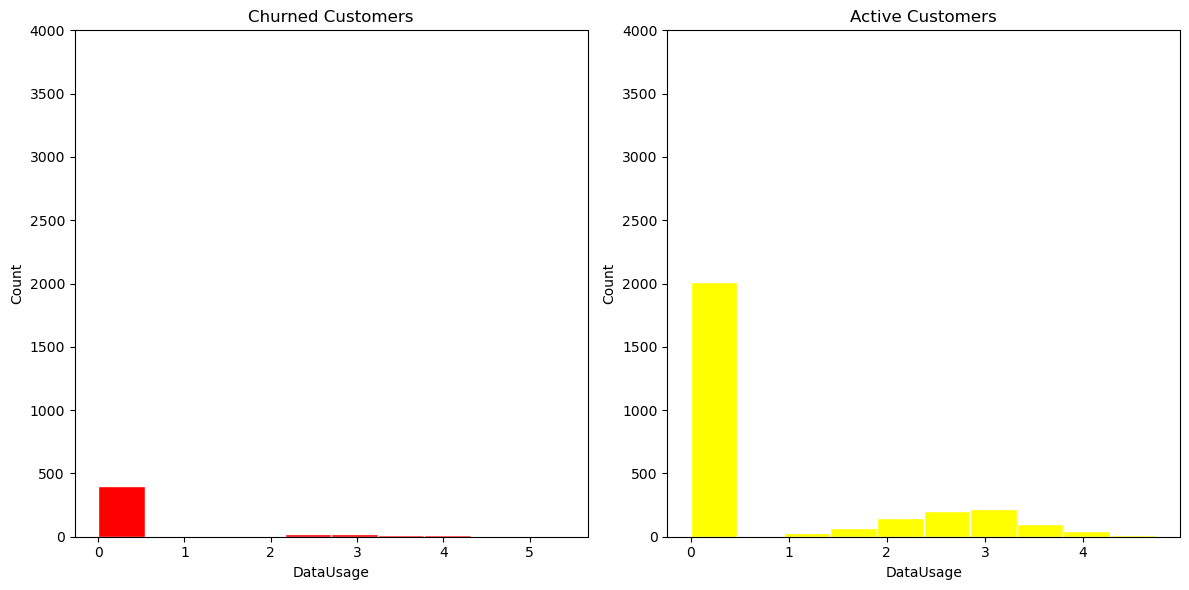

In [214]:
plot_churn_comparison(cca,'DataUsage',color='yellow',)

#### insights
1. Average data Useage for Active users is 3gb and it is worth considering that both churned and existing customers have similar Data useage and maximum data used is not more than 4-5 gb in any case


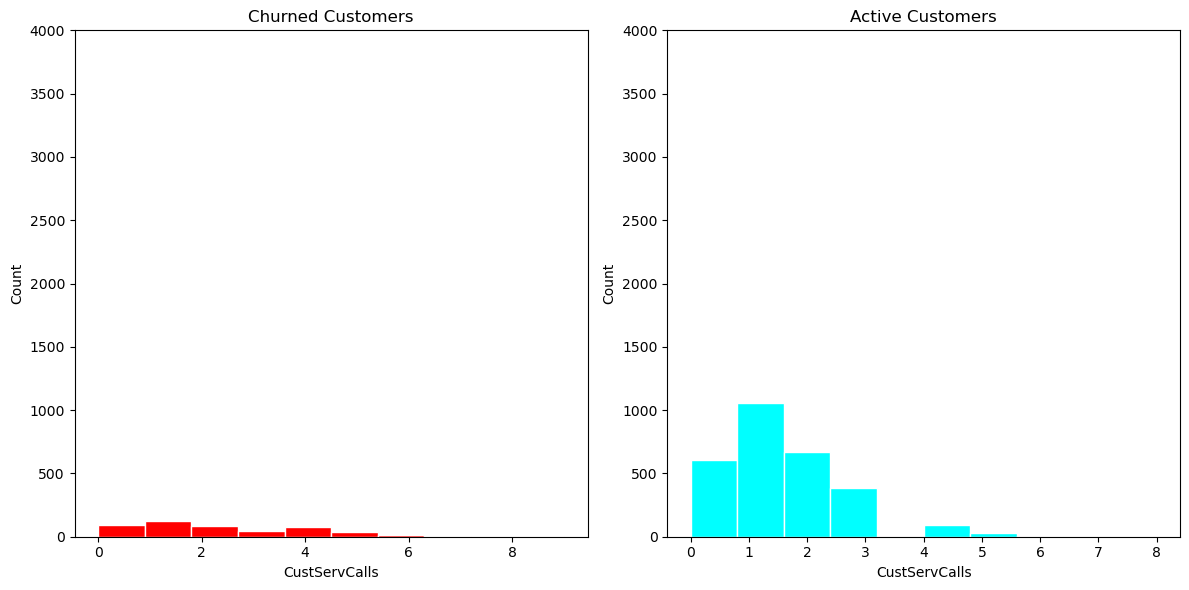

In [215]:
plot_churn_comparison(cca,'CustServCalls',color='aqua',)

In [216]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.CustServCalls.mean()

2.229813664596273

In [217]:
#mode or median will be better as average for churned customers will be more as number is very less

active.CustServCalls.mean()

1.4498245614035088

#### Insights
1. It is clear that churned customers have interacted with customer service more than active ones ,Though not significant but we can conclude that there were few issues that they were facing

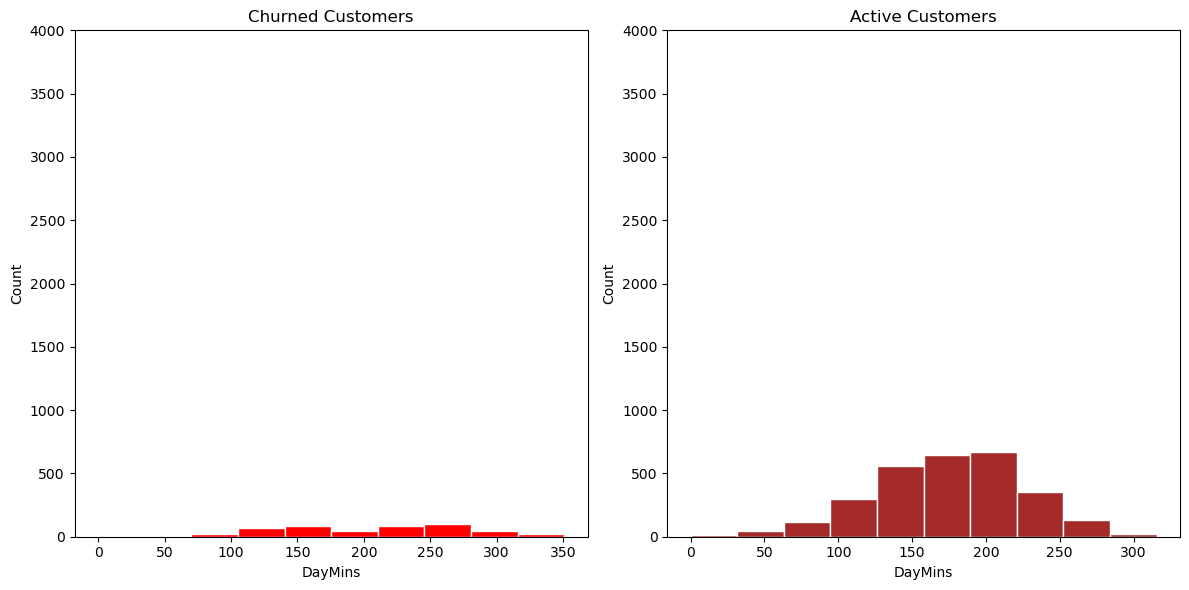

In [218]:
plot_churn_comparison(cca,'DayMins',color='brown',)

In [219]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.DayMins.mean()

206.91407867494814

In [220]:
#mode or median will be better as average for churned customers will be more as number is very less

active.DayMins.mean()

175.17575438596492

#### Insights
1. As clear from the above graphs the churned Customers have high mins useage as compared to active ones 

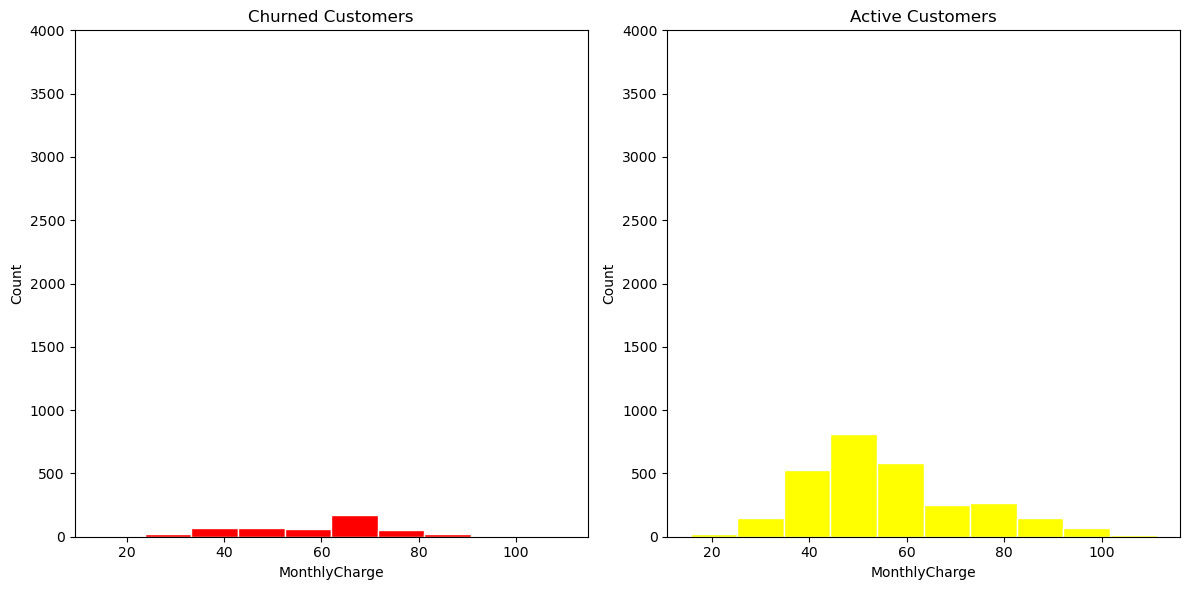

In [221]:
#mode or median will be better as average for churned customers will be more as number is very less

plot_churn_comparison(cca,'MonthlyCharge',color='yellow',)

In [222]:
#mode or median will be better as average for churned customers will be more as number is very less

active.MonthlyCharge.mean()

55.8162456140352

In [223]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.MonthlyCharge.mean()

59.190062111801225

#### Insights 

1. Churned customers have a higher Average Monthly charge than Active users may be we might have to reduce the call charges 

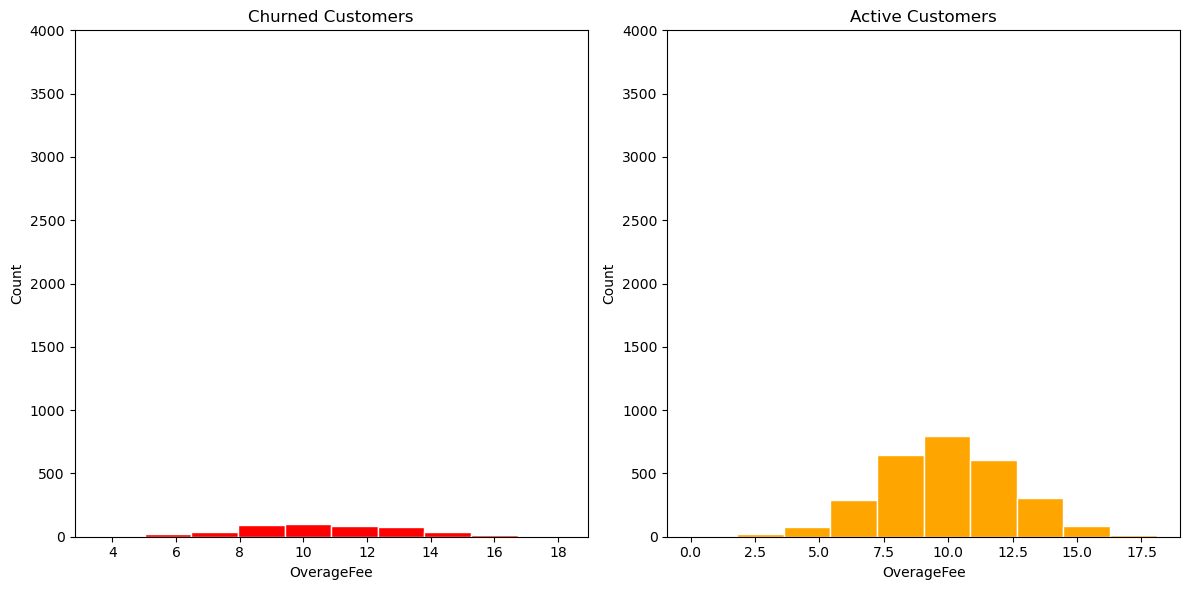

In [224]:
plot_churn_comparison(cca,'OverageFee',color='orange',)

In [225]:
#mode or median will be better as average for churned customers will be more as number is very less
active.OverageFee.mean()


9.954617543859621

In [226]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.OverageFee.mean()

10.623084886128353

#### Insights 
1. The Overage fee is slightly more for churned customers


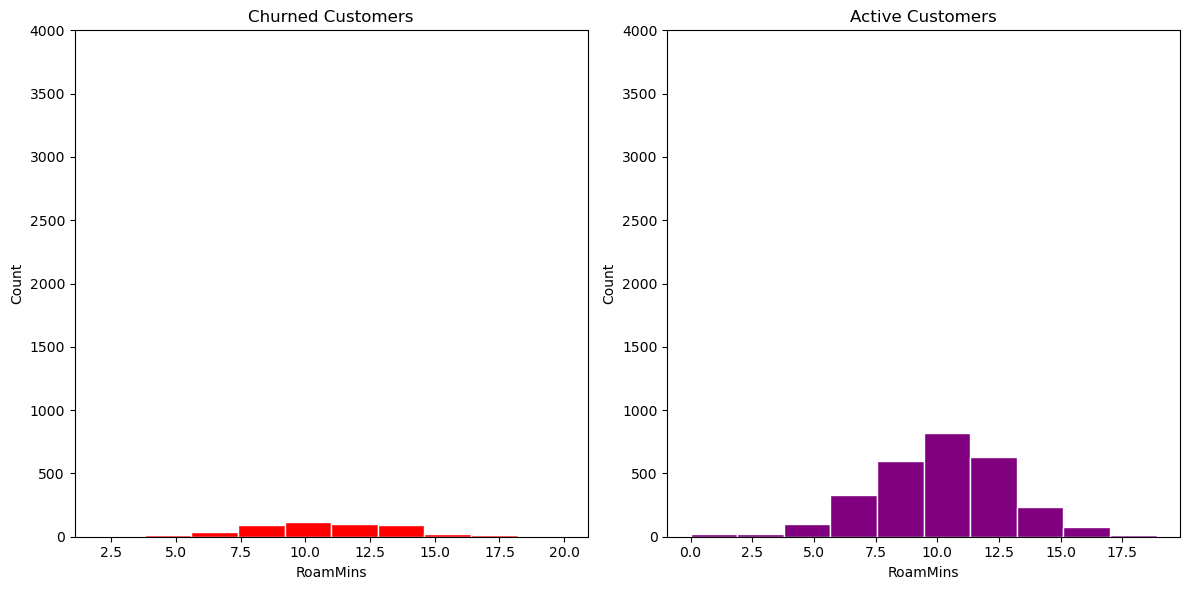

In [227]:
plot_churn_comparison(cca,'RoamMins',color='purple',)

In [228]:
active.RoamMins.mean()


10.158877192982445

In [229]:
churned.RoamMins.mean()


10.699999999999996

#### Insights
1. Roam mins for both segements are similar


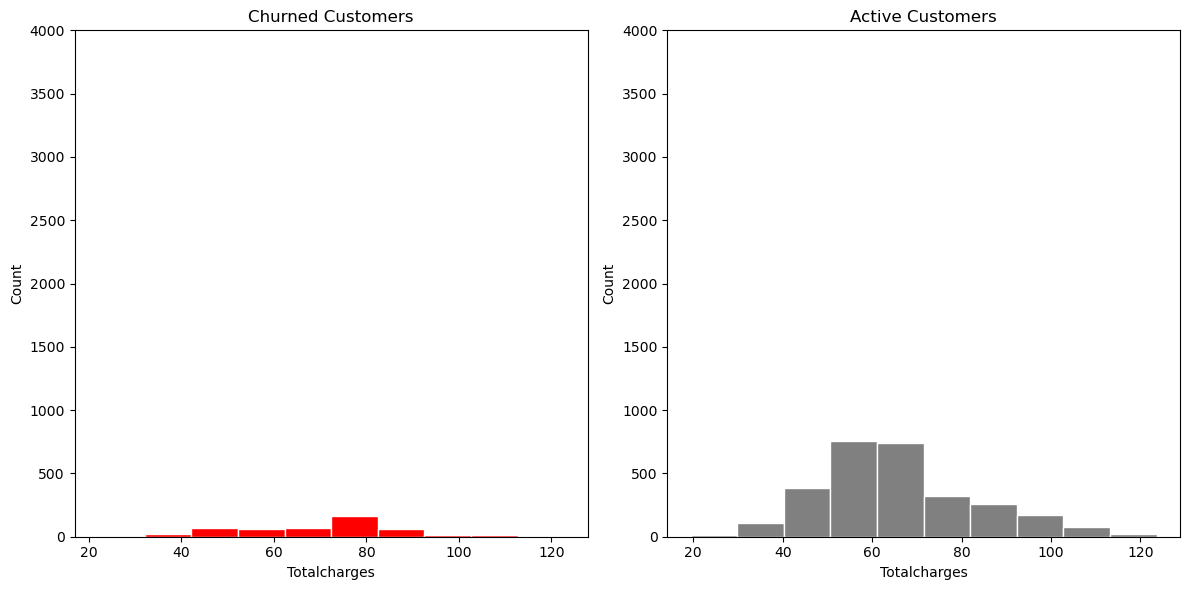

In [230]:
plot_churn_comparison(cca,'Totalcharges',color='grey',)

In [231]:
churned.Totalcharges.mode()[1]

74.38

In [232]:
active.Totalcharges.mode()[1]

64.97

#### Insights
1. Most of the churned customers have the Monthly bill of 75 which is higher than the active users i.e 10 dollars more 

2. It gives an insight that our call charges are higher and churned customers have more Average  Calling Useage than Active users and a lesser data useage ,

## Bivariate analysis 

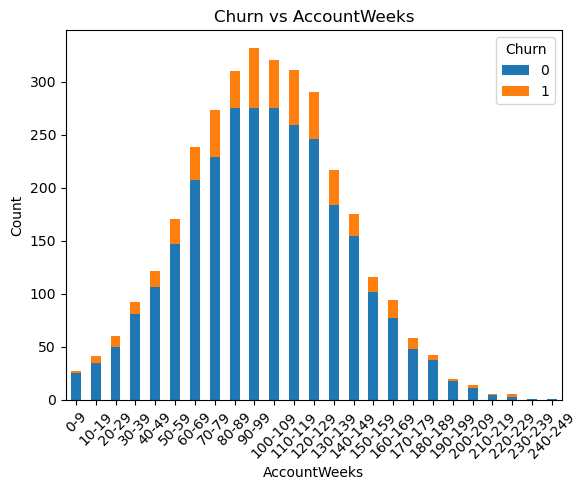

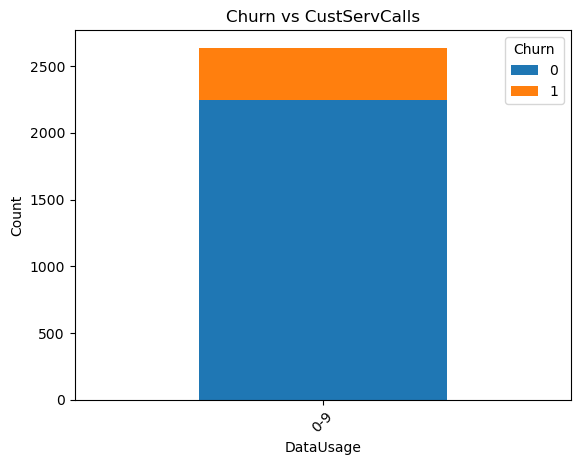

In [246]:
# Define the range of AccountWeeks for grouping
bin_edges = np.arange(0, cca['CustServCalls'].max()+10, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Group the data based on AccountWeeks range and churn status
grouped_data = cca.groupby([pd.cut(cca['CustServCalls'], bins=bin_edges), 'Churn']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('DataUsage')
plt.ylabel('Count')
plt.title('Churn vs CustServCalls')
plt.xticks(np.arange(len(bin_labels)), bin_labels, rotation=45)
plt.legend(title='Churn')
plt.show()

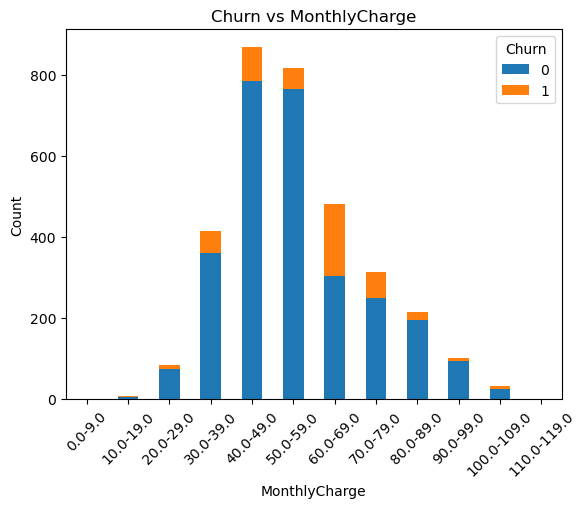

In [252]:
# Define the range of AccountWeeks for grouping
bin_edges = np.arange(0, cca['MonthlyCharge'].max()+10, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Group the data based on AccountWeeks range and churn status
grouped_data = cca.groupby([pd.cut(cca['MonthlyCharge'], bins=bin_edges), 'Churn']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('MonthlyCharge')
plt.ylabel('Count')
plt.title('Churn vs MonthlyCharge')
plt.xticks(np.arange(len(bin_labels)), bin_labels, rotation=45)
plt.legend(title='Churn')
plt.show()

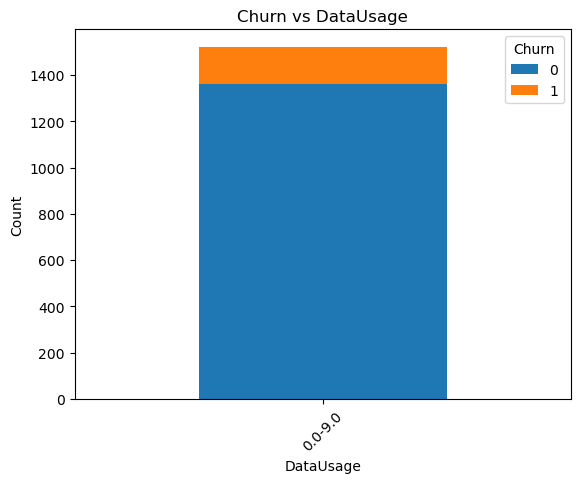

In [245]:
# Define the range of AccountWeeks for grouping
bin_edges = np.arange(0, cca['DataUsage'].max()+10, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Group the data based on AccountWeeks range and churn status
grouped_data = cca.groupby([pd.cut(cca['DataUsage'], bins=bin_edges), 'Churn']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('DataUsage')
plt.ylabel('Count')
plt.title('Churn vs DataUsage')
plt.xticks(np.arange(len(bin_labels)), bin_labels, rotation=45)
plt.legend(title='Churn')
plt.show()

<Figure size 1200x1200 with 0 Axes>

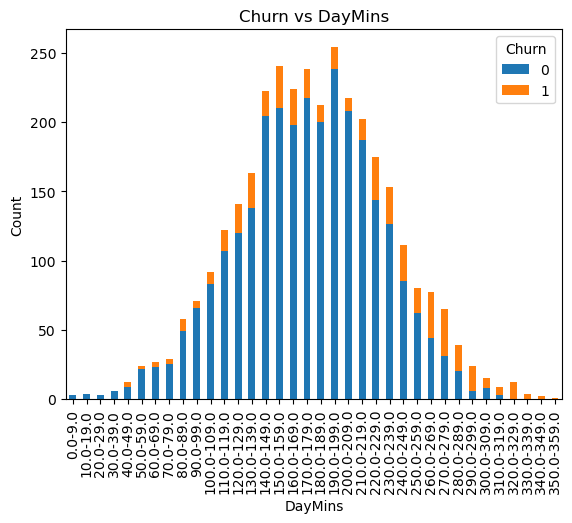

In [251]:
plt.figure(figsize=(12,12))
# Define the range of AccountWeeks for grouping
bin_edges = np.arange(0, cca['DayMins'].max()+10, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Group the data based on AccountWeeks range and churn status
grouped_data = cca.groupby([pd.cut(cca['DayMins'], bins=bin_edges), 'Churn']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('DayMins')
plt.ylabel('Count')
plt.title('Churn vs DayMins')
plt.xticks(np.arange(len(bin_labels)), bin_labels, rotation=90)
plt.legend(title='Churn')
plt.show()



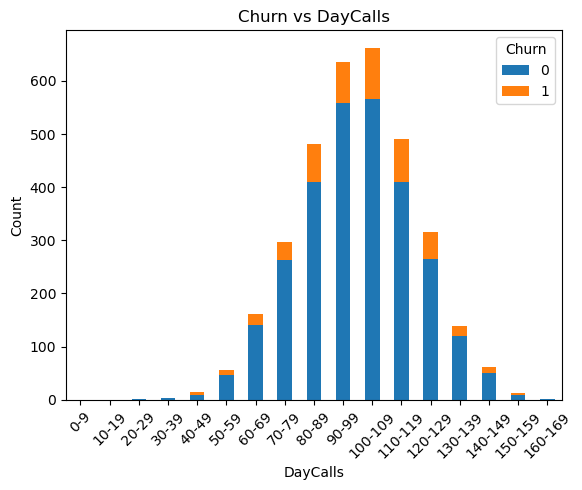

In [247]:
# Define the range of AccountWeeks for grouping
bin_edges = np.arange(0, cca['DayCalls'].max()+10, 10)
bin_labels = [f'{i}-{i+9}' for i in bin_edges[:-1]]

# Group the data based on AccountWeeks range and churn status
grouped_data = cca.groupby([pd.cut(cca['DayCalls'], bins=bin_edges), 'Churn']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('DayCalls')
plt.ylabel('Count')
plt.title('Churn vs DayCalls')
plt.xticks(np.arange(len(bin_labels)), bin_labels, rotation=45)
plt.legend(title='Churn')
plt.show()

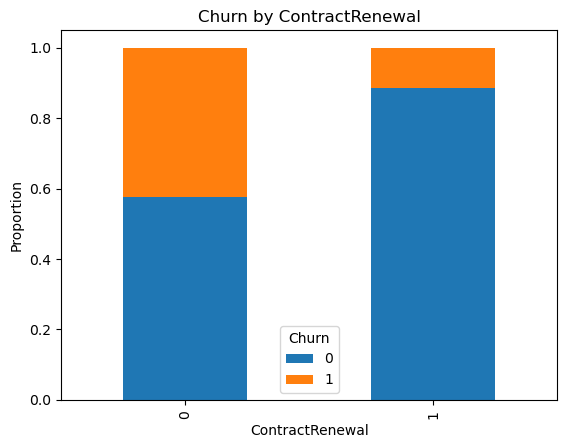

In [242]:
# Bar Chart
churn_counts = cca.groupby('ContractRenewal')['Churn'].value_counts(normalize=True).unstack()
churn_counts.plot(kind='bar', stacked=True)
plt.xlabel('ContractRenewal')
plt.ylabel('Proportion')
plt.title('Churn by ContractRenewal')
plt.legend(title='Churn')
plt.show()



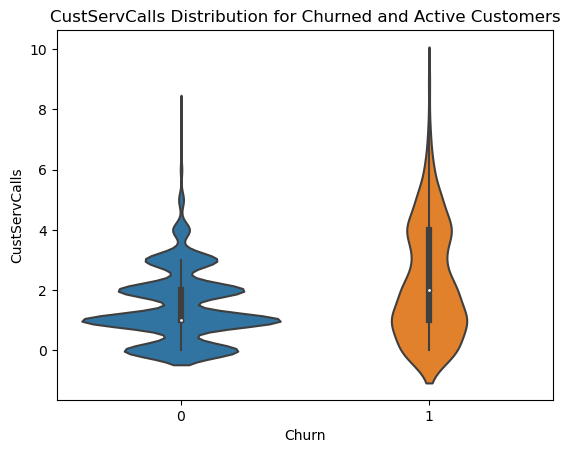

In [244]:
sns.violinplot(x=cca['Churn'], y=cca['CustServCalls'])
plt.xlabel('Churn')
plt.ylabel('CustServCalls')
plt.title('CustServCalls Distribution for Churned and Active Customers')
plt.show()